Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [159]:
# imports

import pandas as pd


file_path_bike = '/Users/priyaganesan/Desktop/python_exercise/Pandas_exercise/db/Final-Project-statistical-Modelling-with-Python/bike_info_csv.csv'
file_path_yelp='/Users/priyaganesan/Desktop/python_exercise/Pandas_exercise/db/Final-Project-statistical-Modelling-with-Python/yelp.csv'
#Read the CSV file into a DataFrame
bike_df = pd.read_csv(file_path_bike)
yelp_df=pd.read_csv(file_path_yelp)


In [160]:
bike_df.info()
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   0           0 non-null      float64
 1   name        767 non-null    object 
 2   free_bikes  767 non-null    float64
 3   latitude    767 non-null    float64
 4   longitude   767 non-null    float64
dtypes: float64(4), object(1)
memory usage: 30.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3677 entries, 0 to 3676
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          3677 non-null   object 
 1   closed        3677 non-null   bool   
 2   review        3677 non-null   int64  
 3   rating        3677 non-null   float64
 4   categories    3677 non-null   object 
 5   phone         3542 non-null   float64
 6   distance      3677 non-null   float64
 7   latitude      3677 non-null   float64
 8   longitude     

In [162]:
#rename name in bike df as station_name
# Rename column 'name' to 'station_name'
bike_df.rename(columns={'name':'station_name'}, inplace=True)
bike_df.rename(columns={'latitude':'station_latitude'}, inplace=True)
bike_df.rename(columns={'longitude':'station_longitude'}, inplace=True)


In [ ]:
bike_df.info()

Merge bile station Information with POI details

In [166]:
merged_df = pd.merge( yelp_df,bike_df, on=['station_name'], how='left')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3677 entries, 0 to 3676
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               3677 non-null   object 
 1   closed             3677 non-null   bool   
 2   review             3677 non-null   int64  
 3   rating             3677 non-null   float64
 4   categories         3677 non-null   object 
 5   phone              3542 non-null   float64
 6   distance           3677 non-null   float64
 7   latitude           3677 non-null   float64
 8   longitude          3677 non-null   float64
 9   address            3677 non-null   object 
 10  station_name       3677 non-null   object 
 11  0                  0 non-null      float64
 12  free_bikes         3677 non-null   float64
 13  station_latitude   3677 non-null   float64
 14  station_longitude  3677 non-null   float64
dtypes: bool(1), float64(9), int64(1), object(4)
memory usage: 405.9+ KB


In [167]:
columns_to_becopied=['name','review','rating','categories','phone','distance','address','station_name','free_bikes']
poi_df=merged_df[columns_to_becopied].copy()

In [280]:
poi_df.head()
#copy this into a csv
poi_df.to_csv('../poi_csv.csv', index=False)

EDA for merged_df

In [257]:
poi_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3677 entries, 0 to 3676
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          3677 non-null   object 
 1   review        3677 non-null   int64  
 2   rating        3677 non-null   float64
 3   categories    3677 non-null   object 
 4   phone         3542 non-null   float64
 5   distance      3677 non-null   float64
 6   address       3677 non-null   object 
 7   station_name  3677 non-null   object 
 8   free_bikes    3677 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 258.7+ KB


In [259]:
poi_df.duplicated().sum()
poi_df.head()

,name,review,rating,categories,phone,distance,address,station_name,free_bikes
0,Udupi Palace,208,3.5,Indian,1.416406e+10,782.410965,"1432 Gerrard Street East, Toronto, ON M4L 1Z6,...",Queen St E / Woodward Ave,7.0
1,KaSpace Cafe,9,5.0,Vegetarian,1.647658e+10,1023.018862,"1432 Gerrard Street East, Toronto, ON M4L 1Z6,...",Queen St E / Woodward Ave,7.0
2,Bombay Chowpatty,59,3.0,Indian,1.416406e+10,832.357744,"1432 Gerrard Street East, Toronto, ON M4L 1Z6,...",Queen St E / Woodward Ave,7.0
3,The Social Gardener,5,3.5,Vegan,1.416466e+10,839.372147,"1432 Gerrard Street East, Toronto, ON M4L 1Z6,...",Queen St E / Woodward Ave,7.0
4,Gerrard/Ashdale Library,4,3.5,Libraries,1.416394e+10,802.887228,"1432 Gerrard Street East, Toronto, ON M4L 1Z6,...",Queen St E / Woodward Ave,7.0


In [258]:
poi_df.describe()

,review,rating,phone,distance,free_bikes
count,3677.000000,3677.000000,3.542000e+03,3677.000000,3677.000000
mean,33.779712,3.511830,1.478132e+10,714.698056,9.275768
std,68.096359,0.773126,1.053405e+09,303.241737,8.501014
min,1.000000,1.000000,1.289317e+10,11.877956,0.000000
25%,4.000000,3.000000,1.416394e+10,477.393287,1.000000
50%,8.000000,3.500000,1.416792e+10,746.244393,8.000000
75%,25.000000,4.000000,1.647340e+10,946.863351,14.000000
max,512.000000,5.000000,1.888218e+10,1374.998735,39.000000


In [283]:
import matplotlib.pyplot as plt
import seaborn as sns
# columns_to_copy=['name','review','rating','categories','distance','station_name','free_bikes']

# new_df = merged_df[columns_to_copy].copy()
df_vegrest_poi=poi_df[poi_df['categories']!='Libraries']
df_vegrest_poi.loc[:, 'categories'] = 'vegetarianrestaurant'
df_vegrest_poi
#copy this into a csv
df_vegrest_poi.to_csv('../vegrest_csv.csv', index=False)



In [284]:
df_library_poi=poi_df[poi_df['categories']=='Libraries']
df_vegrest_poi.to_csv('../library_csv.csv', index=False)
df_library_poi

,name,review,rating,categories,phone,distance,address,station_name,free_bikes
4,Gerrard/Ashdale Library,4,3.5,Libraries,1.416394e+10,802.887228,"1432 Gerrard Street East, Toronto, ON M4L 1Z6,...",Queen St E / Woodward Ave,7.0
5,Perth-Dupont Branch Public Library,3,3.5,Libraries,1.416394e+10,943.674994,"1625 Dufferin Street, Toronto, ON M6H 3L9, Canada",Primrose Ave / Davenport Rd,3.0
6,Dufferin St Clair W Public Library,3,4.0,Libraries,1.416394e+10,681.297003,"1625 Dufferin Street, Toronto, ON M6H 3L9, Canada",Primrose Ave / Davenport Rd,3.0
10,Gerrard/Ashdale Library,4,3.5,Libraries,1.416394e+10,761.285413,"1432 Gerrard Street East, Toronto, ON M4L 1Z6,...",Queen St E / Rhodes Ave,20.0
24,Ryerson University Student Learning Centre,4,3.5,Libraries,1.416980e+10,606.436751,"154 University Ave, Unit 100, Toronto, ON M5H ...",Bond St / Queen St E,31.0
...,...,...,...,...,...,...,...,...,...
3666,Ryerson University Student Learning Centre,4,3.5,Libraries,1.416980e+10,788.934959,"100 Queen Street W, Nathan Phillips Square, To...",Richmond St E / Jarvis St Green P,11.0
3673,City Hall Public Library,6,3.5,Libraries,1.416394e+10,776.740866,"100 Queen Street W, Nathan Phillips Square, To...",Richmond St E / Jarvis St Green P,11.0
3674,Toronto Public Library - Parliament Street Branch,6,2.0,Libraries,1.416394e+10,314.733258,"495 Sherbourne St, Toronto, ON M4X 1L1, Canada",Oak St / Sackville St,1.0
3675,Toronto Public Library - Riverdale,4,4.0,Libraries,1.416394e+10,1010.279295,"495 Sherbourne St, Toronto, ON M4X 1L1, Canada",Oak St / Sackville St,1.0


In [177]:
df_vegrest_poi.duplicated().sum()

0

In [178]:
df_vegrest_poi.describe()

,review,rating,phone,distance,free_bikes
count,2484.000000,2484.000000,2.394000e+03,2484.000000,2484.000000
mean,46.171900,3.459944,1.507648e+10,712.131190,10.579308
std,79.534848,0.788373,1.171795e+09,305.030762,8.945248
min,1.000000,1.000000,1.289317e+10,15.857119,0.000000
25%,6.000000,3.000000,1.416591e+10,477.262452,3.000000
50%,11.000000,3.500000,1.416901e+10,738.650602,10.000000
75%,43.000000,4.000000,1.647351e+10,943.464684,16.000000
max,512.000000,5.000000,1.888218e+10,1374.998735,39.000000


In [181]:
df_vegrest_poi = df_vegrest_poi.drop_duplicates()
df_vegrest_poi

,name,review,rating,distance,categories,station_name,free_bikes
0,Udupi Palace,208,3.5,782.410965,vegetarianrestaurant,Queen St E / Woodward Ave,7.0
1,KaSpace Cafe,9,5.0,1023.018862,vegetarianrestaurant,Queen St E / Woodward Ave,7.0
2,Bombay Chowpatty,59,3.0,832.357744,vegetarianrestaurant,Queen St E / Woodward Ave,7.0
3,The Social Gardener,5,3.5,839.372147,vegetarianrestaurant,Queen St E / Woodward Ave,7.0
7,Udupi Palace,208,3.5,750.617283,vegetarianrestaurant,Queen St E / Rhodes Ave,20.0
...,...,...,...,...,...,...,...
3668,Fit For Life,10,2.5,656.863144,vegetarianrestaurant,Richmond St E / Jarvis St Green P,11.0
3669,Freshii,11,3.0,1021.387572,vegetarianrestaurant,Richmond St E / Jarvis St Green P,11.0
3670,Fit For Life,1,4.0,762.282582,vegetarianrestaurant,Richmond St E / Jarvis St Green P,11.0
3671,Freshii,2,3.5,561.771465,vegetarianrestaurant,Richmond St E / Jarvis St Green P,11.0


In [180]:
df_library_poi.describe()

,review,rating,phone,distance,free_bikes
count,1193.000000,1193.000000,1.148000e+03,1193.000000,1193.000000
mean,7.977368,3.619866,1.416582e+10,720.042645,6.561609
std,11.707365,0.728932,2.665900e+06,299.538921,6.728291
min,1.000000,1.000000,1.416394e+10,11.877956,0.000000
25%,3.000000,3.000000,1.416394e+10,480.547222,1.000000
50%,4.000000,3.500000,1.416394e+10,752.374335,5.000000
75%,8.000000,4.000000,1.416978e+10,953.533793,11.000000
max,70.000000,5.000000,1.416980e+10,1362.229749,39.000000


In [182]:
df_library_poi = df_library_poi.drop_duplicates()
df_library_poi

,name,review,rating,categories,phone,distance,address,station_name,free_bikes
4,Gerrard/Ashdale Library,4,3.5,Libraries,1.416394e+10,802.887228,"1432 Gerrard Street East, Toronto, ON M4L 1Z6,...",Queen St E / Woodward Ave,7.0
5,Perth-Dupont Branch Public Library,3,3.5,Libraries,1.416394e+10,943.674994,"1625 Dufferin Street, Toronto, ON M6H 3L9, Canada",Primrose Ave / Davenport Rd,3.0
6,Dufferin St Clair W Public Library,3,4.0,Libraries,1.416394e+10,681.297003,"1625 Dufferin Street, Toronto, ON M6H 3L9, Canada",Primrose Ave / Davenport Rd,3.0
10,Gerrard/Ashdale Library,4,3.5,Libraries,1.416394e+10,761.285413,"1432 Gerrard Street East, Toronto, ON M4L 1Z6,...",Queen St E / Rhodes Ave,20.0
24,Ryerson University Student Learning Centre,4,3.5,Libraries,1.416980e+10,606.436751,"154 University Ave, Unit 100, Toronto, ON M5H ...",Bond St / Queen St E,31.0
...,...,...,...,...,...,...,...,...,...
3666,Ryerson University Student Learning Centre,4,3.5,Libraries,1.416980e+10,788.934959,"100 Queen Street W, Nathan Phillips Square, To...",Richmond St E / Jarvis St Green P,11.0
3673,City Hall Public Library,6,3.5,Libraries,1.416394e+10,776.740866,"100 Queen Street W, Nathan Phillips Square, To...",Richmond St E / Jarvis St Green P,11.0
3674,Toronto Public Library - Parliament Street Branch,6,2.0,Libraries,1.416394e+10,314.733258,"495 Sherbourne St, Toronto, ON M4X 1L1, Canada",Oak St / Sackville St,1.0
3675,Toronto Public Library - Riverdale,4,4.0,Libraries,1.416394e+10,1010.279295,"495 Sherbourne St, Toronto, ON M4X 1L1, Canada",Oak St / Sackville St,1.0


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [185]:
df_restaurant_categories=poi_df[(poi_df['categories']!='Libraries') & (poi_df['categories']!='Museums')]

Top Restaurants by categories

In [219]:
df_restaurant_categories.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2459 entries, 0 to 3672
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2459 non-null   object 
 1   review        2459 non-null   int64  
 2   rating        2459 non-null   float64
 3   categories    2459 non-null   object 
 4   phone         2394 non-null   float64
 5   distance      2459 non-null   float64
 6   address       2459 non-null   object 
 7   station_name  2459 non-null   object 
 8   free_bikes    2459 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 192.1+ KB


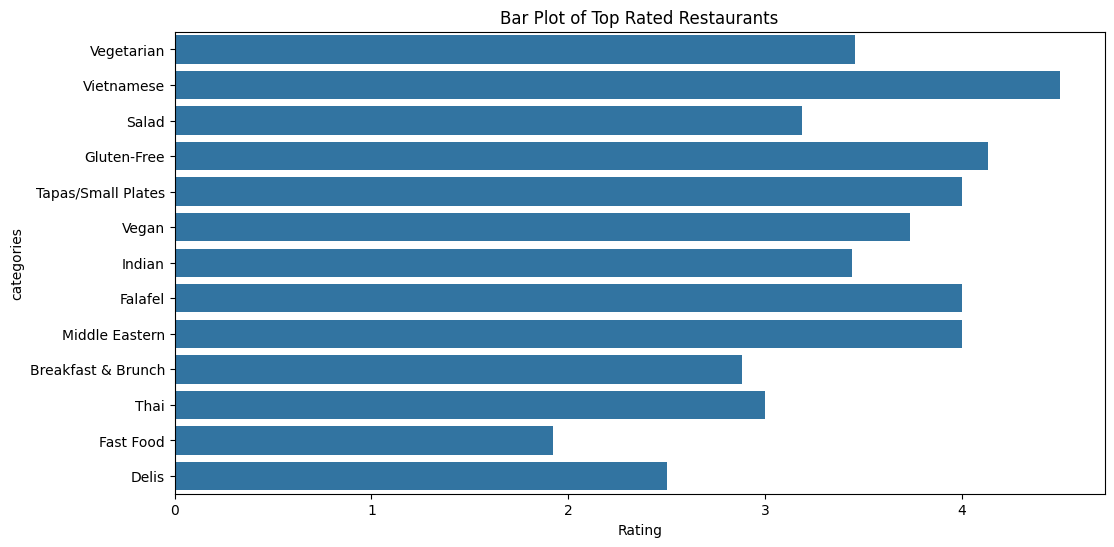

In [213]:
#Top Restaurants by categories

merged_df_sorted = df_restaurant_categories.sort_values(by='rating', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='categories', data=merged_df_sorted,errorbar=None)
plt.xlabel('Rating')
plt.ylabel('categories')
plt.title('Bar Plot of Top Rated Restaurants')

plt.show()


Top Restaurants 

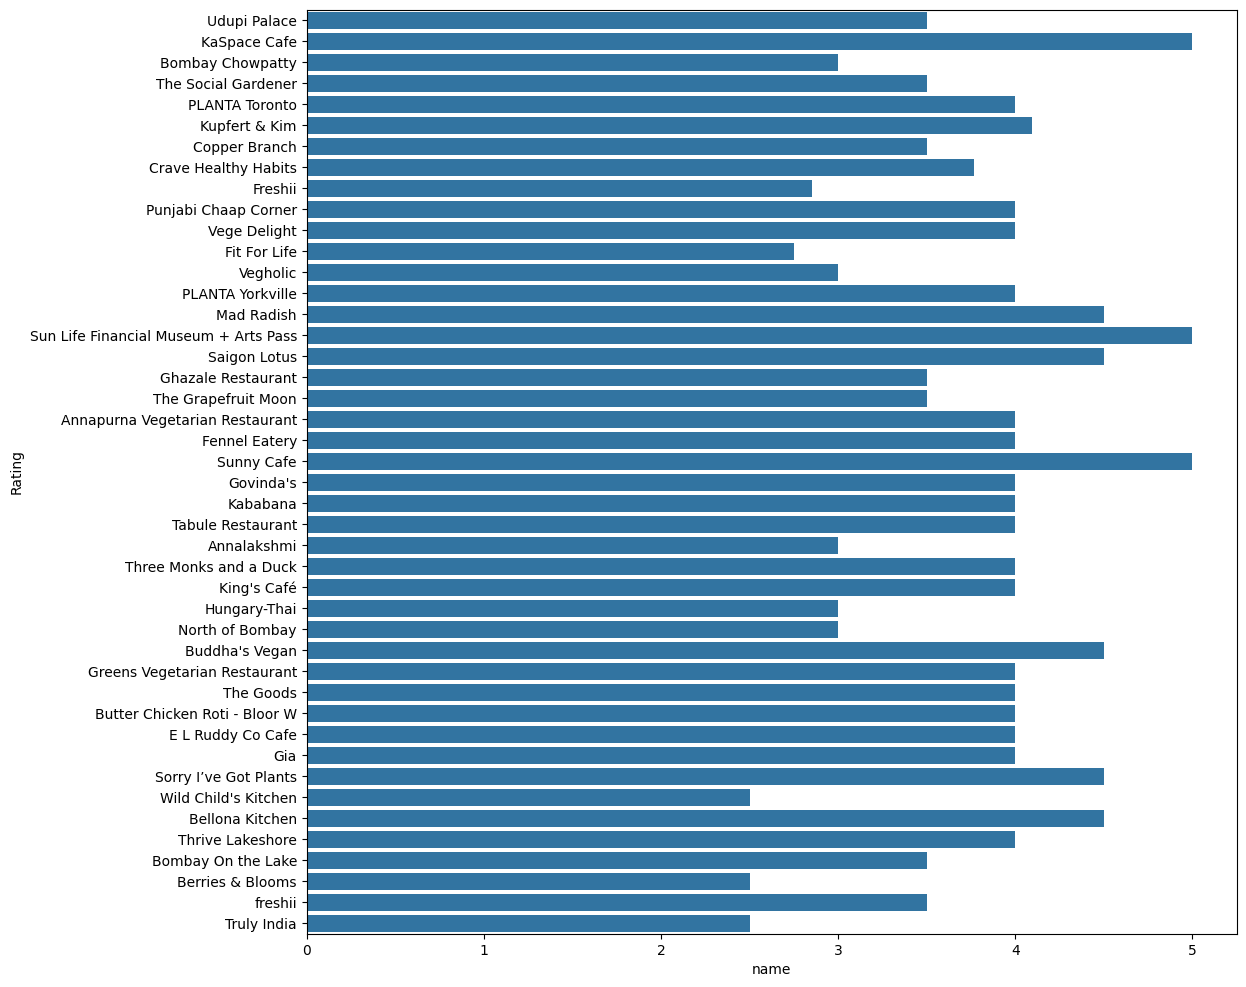

In [189]:
#Top Restaurants by categories
plt.figure(figsize=(12, 12))
sns.barplot(x='rating', y='name', data=df_vegrest_poi, errorbar=None)
plt.xlabel('name')
plt.ylabel('Rating')
plt.show()

Top Libraries

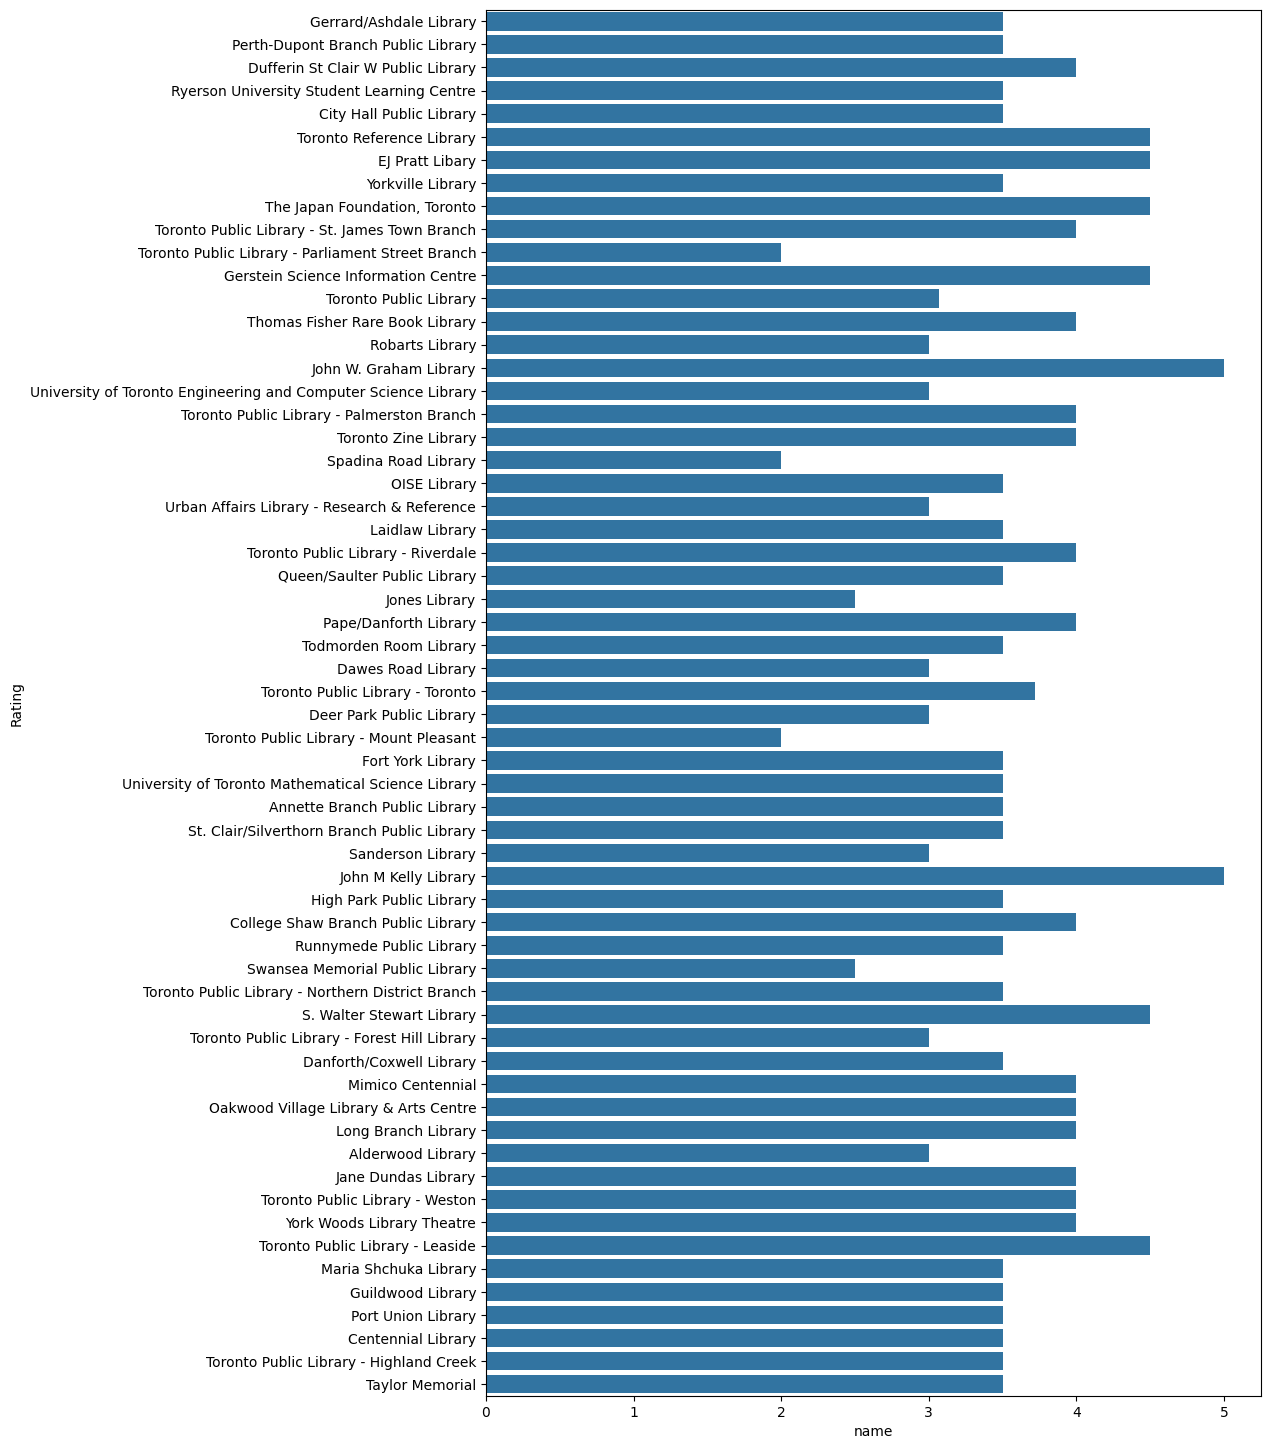

In [196]:
#Top Libraries
plt.figure(figsize=(10, 18))
sns.barplot(x='rating', y='name', data=df_library_poi, errorbar=None)
plt.xlabel('name')
plt.ylabel('Rating')
plt.show()

Restaurant Rating

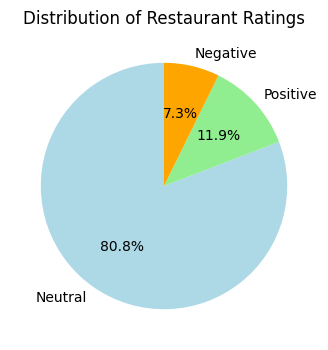

In [204]:

# Create a new column 'sentiment' based on rating categories
df_vegrest_poi['sentiment'] = pd.cut(df_vegrest_poi['rating'], bins=[-float('inf'), 2, 4, float('inf')],
                         labels=['Negative', 'Neutral', 'Positive'])

# Count the number of restaurants in each sentiment category
sentiment_counts = df_vegrest_poi['sentiment'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(4, 4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'orange'])
plt.title('Distribution of Restaurant Ratings')
plt.show()

Text(0, 0.5, 'Rating')

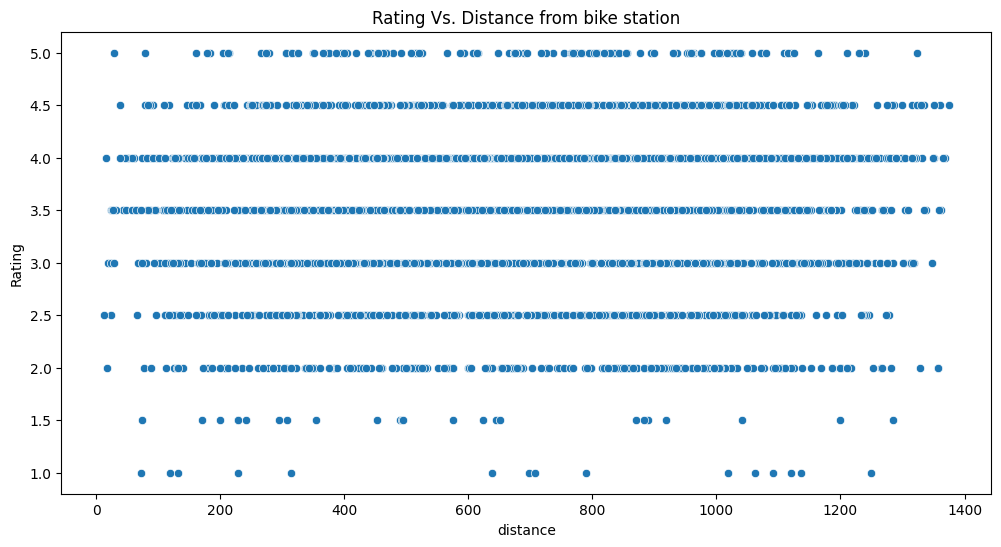

In [224]:
# Scatter plot to visualize the relationship between free bikes and rating
plt.figure(figsize=(12, 6))
scatter_plot=sns.scatterplot(x='distance', y='rating', data=poi_df)
plt.title('Rating Vs. Distance from bike station')
plt.xlabel('distance')
plt.ylabel('Rating')
# #Add POI names below the graph
# for index, row in df_library_poi.iterrows():
#     scatter_plot.text(row['free_bikes'], row['rating'], row['name'], color='black', ha='center', va='bottom')







In [250]:
mean_rating_by_station = df_vegrest_poi.groupby('station_name')['rating'].mean()
mean_rating_by_stations = pd.DataFrame(mean_rating_by_station)
mean_rating_by_stations

,rating
station_name,
1 Market St - SMART,2.968750
111 Bond St (North of Dundas St E) - SMART,3.323529
12 Harbour St,3.289474
128 Sterling Rd - SMART,4.000000
1303 Yonge St - SMART,3.250000
...,...
Yonge St / St Clair Ave,2.500000
Yonge St / Woburn Ave - SMART,1.000000
Yonge St / Wood St,3.538462


Hypothesis Testing
1.Null Hypothesis(H0): There is no significant difference in the mean rating of restaurants near bike stations and the mean rating of restaurants overall.

2.Alternate Hyptothesis(H1): There is significant difference in the mean rating of restaurants near bike stations compared to the mean rating of restaurant overall

3.conducting t-test to find the significance

In [237]:
# GET the rating for each vegetarisn friendly restaurant 
each_restaurant_rating = df_vegrest_poi[['name', 'rating']].drop_duplicates()
each_restaurant_rating.sort_values(by='rating', ascending=False)


,name,rating
98,Sunny Cafe,5.0
50,Sun Life Financial Museum + Arts Pass,5.0
1,KaSpace Cafe,5.0
35,Mad Radish,4.5
51,Saigon Lotus,4.5
344,Buddha's Vegan,4.5
2003,Bellona Kitchen,4.5
18,Kupfert & Kim,4.5
474,Sorry I’ve Got Plants,4.5
318,King's Café,4.0


In [254]:
# average restaurant rating for each bike station
mean_rating_by_station = df_vegrest_poi.groupby('station_name')['rating'].mean()
mean_rating_by_stations = pd.DataFrame(mean_rating_by_station)
mean_rating_by_stations


,rating
station_name,
1 Market St - SMART,2.968750
111 Bond St (North of Dundas St E) - SMART,3.323529
12 Harbour St,3.289474
128 Sterling Rd - SMART,4.000000
1303 Yonge St - SMART,3.250000
...,...
Yonge St / St Clair Ave,2.500000
Yonge St / Woburn Ave - SMART,1.000000
Yonge St / Wood St,3.538462


In [270]:
from scipy import stats

#set 1: Ratings of all restaurants 
#set 2:Ratings of restaurants near bike stations
set1_ratings = each_restaurant_rating['rating']
set2_ratings = mean_rating_by_stations['rating']

# perform a two_sample t-test
t_stat, p_value = stats.ttest_ind(set1_ratings, set2_ratings, equal_var=False)

#check if the p-value is less than alpha (0.05)
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean ratings.")
    
else:
    print("Null Hypothesis True. There is no significant difference in mean ratings")

Null Hypothesis True. There is no significant difference in mean ratings


In [271]:
p_value

0.05205902926920233

correlation between free bikes and distance to each vegetarian restaurant

In [276]:
correlation_coefficient =poi_df[['distance', 'free_bikes']].corr().iloc[0,1]
correlation_coefficient

-0.13251182646351062

The correlation coefficient is close to 0 but negative indicating a weak negative correlation. This means that as the 'distance' increases, there is a tendency for the 'free_bikes' to decrease slightly, and as the 'distance' decreases, there is a tendency for the 'free_bikes' to increase slightly. However, the relationship is not very strong based on the absolute value of the correlation coefficient.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [255]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection
connection = create_connection("/Users/priyaganesan/desktop/python_exercise/Pandas_exercise/db/Final-Project-statistical-Modelling-with-Python/data/yelp.sqlite")

Connection to SQLite DB successful


Look at the data before and after the join to validate your data.

DF - Before merge

In [277]:
bike_df.head()

,0,station_name,free_bikes,station_latitude,station_longitude
0,NaN,Queen St E / Woodward Ave,7.0,43.665269,-79.319796
1,NaN,Primrose Ave / Davenport Rd,3.0,43.671420,-79.445947
2,NaN,Queen St E / Rhodes Ave,20.0,43.666224,-79.317693
3,NaN,Bond St / Queen St E,31.0,43.653236,-79.376716
4,NaN,Church St / Alexander St,14.0,43.663722,-79.380288


DF - After merge 

In [279]:
merged_df.head()

,name,closed,review,rating,categories,phone,distance,latitude,longitude,address,station_name,0,free_bikes,station_latitude,station_longitude
0,Udupi Palace,False,208,3.5,Indian,1.416406e+10,782.410965,43.672045,-79.322420,"1432 Gerrard Street East, Toronto, ON M4L 1Z6,...",Queen St E / Woodward Ave,NaN,7.0,43.665269,-79.319796
1,KaSpace Cafe,False,9,5.0,Vegetarian,1.647658e+10,1023.018862,43.662630,-79.331900,"1432 Gerrard Street East, Toronto, ON M4L 1Z6,...",Queen St E / Woodward Ave,NaN,7.0,43.665269,-79.319796
2,Bombay Chowpatty,False,59,3.0,Indian,1.416406e+10,832.357744,43.671982,-79.324374,"1432 Gerrard Street East, Toronto, ON M4L 1Z6,...",Queen St E / Woodward Ave,NaN,7.0,43.665269,-79.319796
3,The Social Gardener,False,5,3.5,Vegan,1.416466e+10,839.372147,43.671644,-79.325385,"1432 Gerrard Street East, Toronto, ON M4L 1Z6,...",Queen St E / Woodward Ave,NaN,7.0,43.665269,-79.319796
4,Gerrard/Ashdale Library,False,4,3.5,Libraries,1.416394e+10,802.887228,43.672482,-79.322082,"1432 Gerrard Street East, Toronto, ON M4L 1Z6,...",Queen St E / Woodward Ave,NaN,7.0,43.665269,-79.319796


In [261]:
# insert data from Bike_station dataframe
bike_df.to_sql('Bike_stations', connection, if_exists='replace', index=False)



767

In [262]:
# insert data from joined table
poi_df.to_sql('Poi', connection, if_exists='replace',index=False)

3677

In [263]:
# insert data from Bike_sdf_vegrest_poi  dataframe
df_vegrest_poi.to_sql('Restaurant', connection, if_exists='replace', index=False)



2484

In [264]:
# insert data from df_library_poi dataframe
df_library_poi.to_sql('Library', connection, if_exists='replace', index=False)



1193

In [265]:
# commit changes
connection.commit()

In [266]:
# create a cursor object to execute SQL queries
cursor = connection.cursor()

In [267]:
connection.commit()

In [268]:
# close the database connection
connection.close()